In [1]:
#handling manipulation of data to get size of images and count them
import pandas as pd

import numpy as np

#handling showing images 
import matplotlib.pyplot as plt
%matplotlib inline

#handling style of showing images and graphics in matplotlib
#import seaborn as sns
#sns.set(style="whitegrid")

#handling folders and help in read and remove folders
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#handling pathes of folders and return content of specific pathes
import glob as gb
#handling images and resizing 
import cv2

import tensorflow as tf
from tensorflow import keras

D:\Users\dell\anaconda3\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\dell\anaconda3\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\dell\anaconda3\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\dell\anaconda3\envs\neural\lib\site-packages\tensorflow\python\f

In [2]:
trainpath='D:/datasets/data/C-NMC_Leukemia/training_data/fold_0'
testpath='D:/datasets/data/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data'
predpath='D:/datasets/data/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data'


In [3]:
for folder in os.listdir(trainpath +'/'):
    files = gb.glob(pathname=str(trainpath + '/' + folder+ '/' + '/*.bmp'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 7272 in folder all
For training data, found 3389 in folder hem


In [4]:
files = gb.glob(pathname=str(testpath + '/*.bmp'))
print(f'For testing data, found {len(files)} files')

For testing data, found 2586 files


In [5]:
files = gb.glob(pathname=str(predpath + '/*.bmp'))
print(f'For prediction data, found {len(files)} files')

For prediction data, found 1867 files


In [6]:
#dictionary of all exist classes and its numberic values in used in dataset 
code = {'all':1 ,'hem':0}

#used for getting name of class x  using its number n or y
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [7]:
size = []

for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder +'/*.bmp'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
        
pd.Series(size).value_counts()

(450, 450, 3)    10661
dtype: int64

In [8]:
size = []
    
files = gb.glob(pathname= str( testpath + '/*.bmp'))
for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(600, 600, 3)    2586
dtype: int64

In [9]:
size = []
    
files = gb.glob(pathname= str(predpath + '/*.bmp'))
for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(450, 450, 3)    1867
dtype: int64

In [10]:
s = 80

In [11]:
X_train = []
y_train = []

for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.bmp'))
    for file in files: 
        image = cv2.imread(file)
        #using cv2.resize without determine interpolation make it preserve aspect ratio for each image 
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [12]:
print(f'we have {len(X_train)} items in X_train')

we have 10661 items in X_train


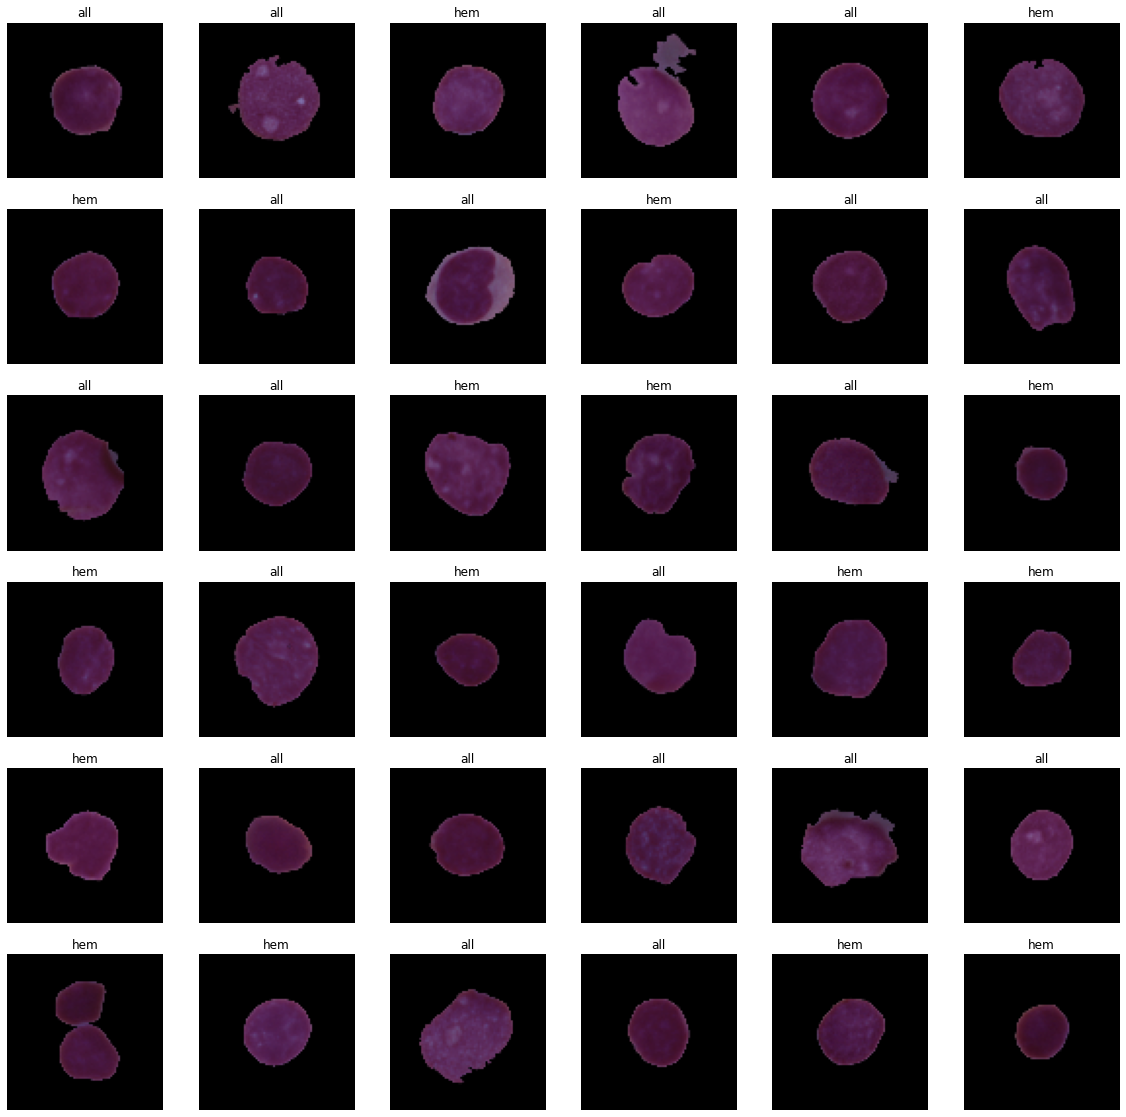

In [13]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [14]:
X_test = []
y_test=[]
 
files = gb.glob(pathname= str(testpath + '/*.bmp'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_test.append(list(image_array))  
    y_test.append(code[folder])

In [15]:
print(f'we have {len(X_test)} items in X_test')

we have 2586 items in X_test


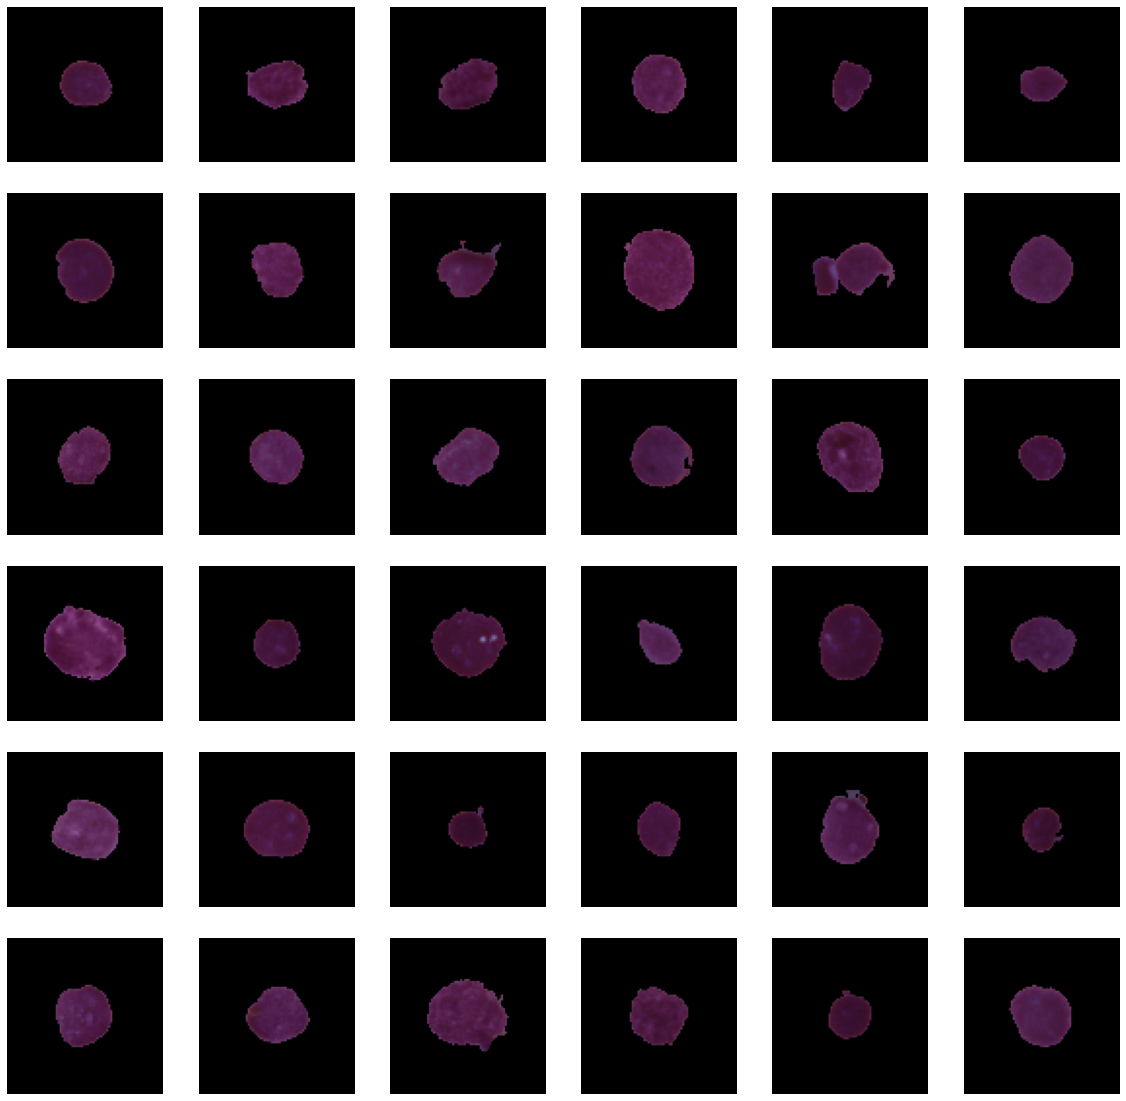

In [16]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')

In [17]:
X_pred = []
files = gb.glob(pathname= str(predpath + '/*.bmp'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [18]:
print(f'we have {len(X_pred)} items in X_pred')

we have 1867 items in X_pred


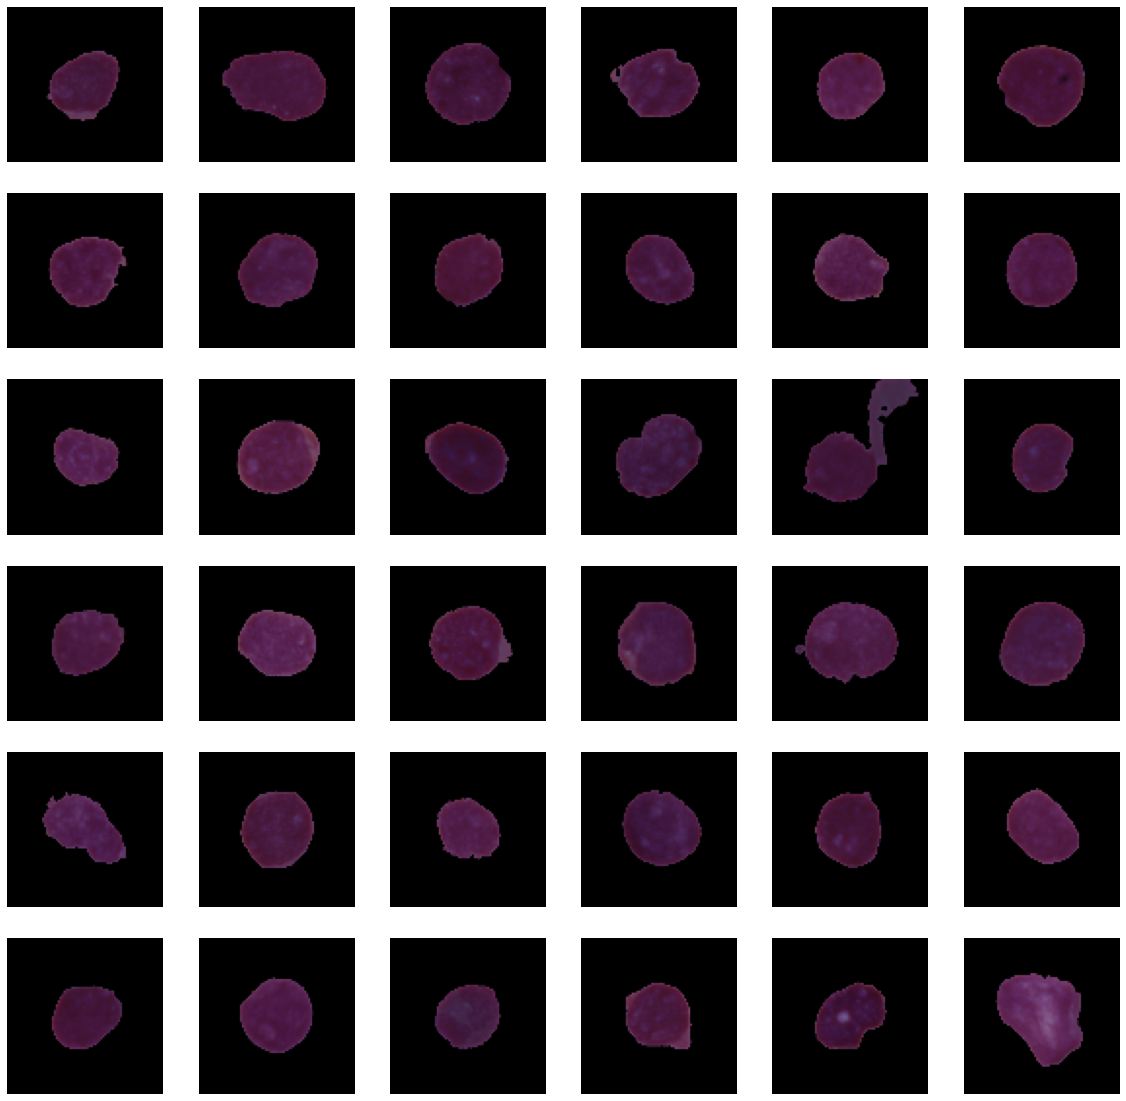

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_train shape  is {y_train.shape}')

X_train shape  is (10661, 80, 80, 3)
X_test shape  is (2586, 80, 80, 3)
X_pred shape  is (1867, 80, 80, 3)
y_test shape  is (2586,)
y_train shape  is (10661,)


In [22]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten() ,    
    keras.layers.Dense(512,activation='relu') ,    
    keras.layers.Dense(120,activation='relu') ,    
    keras.layers.Dense(50,activation='relu') ,        
    keras.layers.Dropout(rate=0.5) ,            
    keras.layers.Dense(2,activation='softmax') ,    
])

KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [23]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 78, 78, 200)       5600      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 76, 76, 150)       270150    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 150)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 120)       162120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 80)        86480     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 50)        36050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 50)          

In [24]:
ThisModel = KerasModel.fit(X_train, y_train, epochs=4,batch_size=64,verbose=1)

Epoch 1/4
10661/10661 [==============================] - 1853s 174ms/step - loss: 0.6728 - acc: 0.7661
Epoch 2/4
10661/10661 [==============================] - 1659s 156ms/step - loss: 0.4745 - acc: 0.7962
Epoch 3/4
10661/10661 [==============================] - 1797s 169ms/step - loss: 0.4529 - acc: 0.8059
Epoch 4/4
10661/10661 [==============================] - 1675s 157ms/step - loss: 0.4342 - acc: 0.8211


In [25]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test,y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

2586/2586 [==============================] - 108s 42ms/step
Test Loss is 0.21759199780359437
Test Accuracy is 0.8994586234487311


In [68]:
y_pred=pd.read_csv("D:/datasets/data/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")
y_pred=y_pred['labels']

In [69]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (1867, 2)


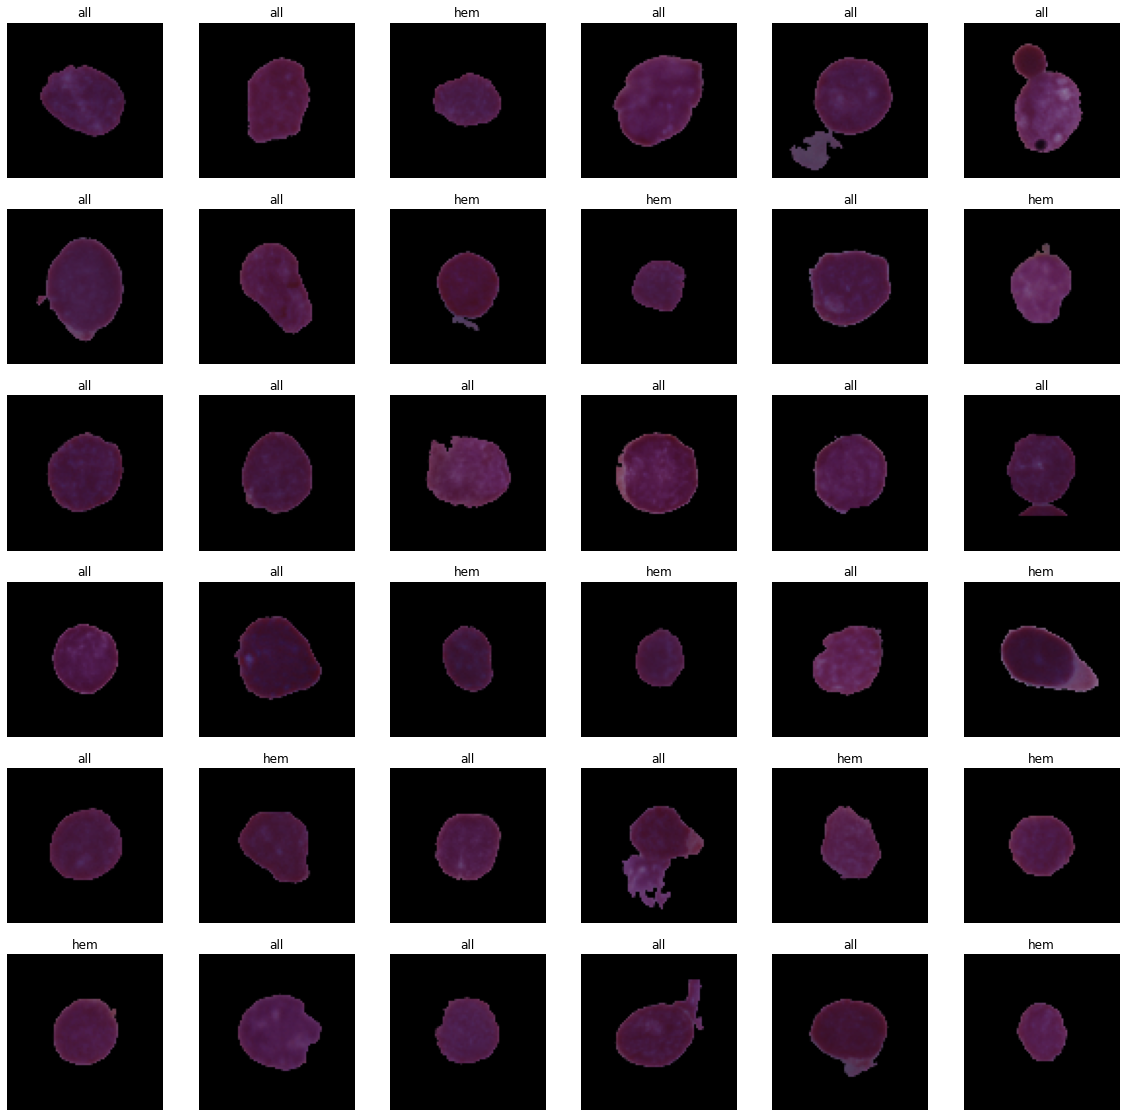

In [70]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [73]:
getcode(np.argmax(y_result[1]))

'all'

In [74]:
print(y_pred[1])

1


In [75]:
getcode(np.argmax(y_result[19]))

'all'

In [76]:
print(y_pred[19])

1


In [100]:
getcode(np.argmax(y_result[997]))

'hem'

In [102]:
print(y_pred[997])

0


In [103]:
KerasModel.save('model_final_one')